## Geometric paramenters for Barkely and Astoria

In this notebook I look at the shape of Barkley and Astoria canyons and, in particular, their geometrc parameters  W, W_S, W_m, L, Shelf break depth, etc to make new canyons for paper 2.

* Bathymetric data for Astoria comes from GEBCO 2014 (30 arc sec).
* Bathymetric data for Barkley comes from SouthVIgrid.mat.



In [131]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from netCDF4 import Dataset

%matplotlib inline

In [132]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [133]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [134]:
def get_topo():
    
    topo=sio.loadmat('/ocean/kramosmu/Data/SouthVIgrid.mat')
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}

    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))

    return tDat

def haversine(lon, lat):
    '''lon: np.array with longitudes
       lat: np array with latitudes
       returns: distance, np array with the distance between the points of lat, lon. Size is one less than lat, lon'''
    
    R = 6366.371 # km, Radius of earth at 48 deg N.
    dlon = lon[:-1] - lon[1:]
    dlat = lat[:-1] - lat[1:]
    a = (np.sin(dlat/2))**2 + (np.cos(lat[:-1]) * np.cos(lat[1:]) * (np.sin(dlon/2))**2)
    c = 2.0 * np.arctan2( np.sqrt(a), np.sqrt(1-a) )
    distance = R * c
    return distance

In [150]:
astoria_file = '/ocean/kramosmu/MultipleCanyons/data/gebco_bathy_Astoria/GEBCO_2014_Astoria.nc'

with Dataset(astoria_file, 'r') as nbl:
    dep_Ast = nbl.variables['elevation'][:]
    lon_Ast = nbl.variables['lon'][:]
    lat_Ast = nbl.variables['lat'][:]

In [151]:
# SouthVIgrid.mat gives lat shape 1474, lon shape 890 and dpth shape (890,1474)
tDat = get_topo()

Text(0.5,1,'Astoria Canyon and company')

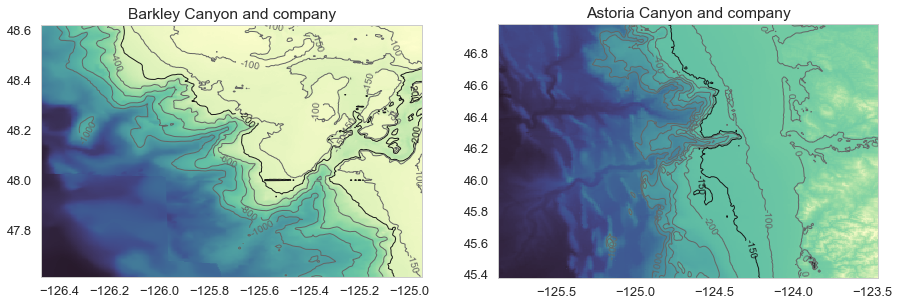

In [152]:
# Barkley
Wlim = 450 
Elim = 900
Nlim = 500
Slim = 50

# Astoria
AsW = 15
AsE =-15

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Barkley
ax1.pcolor(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],
                 [-1000, -800, -600, -400, -200,-150, -100, 0],
                 colors=['0.4','0.4','0.4','0.4','0.1','0.4','0.4','0.4'],linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)
ax1.set_title('Barkley Canyon and company')

# Astoria
ax2.pcolor(lon_Ast[AsW:AsE],lat_Ast,dep_Ast[:,AsW:AsE],cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_Ast[AsW:AsE],lat_Ast,dep_Ast[:,AsW:AsE],
                  [-1000, -800, -600, -400, -200,-150, -100, 0],
                  colors=['0.4','0.4','0.4','0.4','0.4','0.1','0.4','0.4'],
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.set_aspect(1)
ax2.set_title('Astoria Canyon and company')

### Plan for each canyon

2. Find length - Convert lat-lon to km using Haversine fromula http://andrew.hedges.name/experiments/haversine/ 
3. Find rim from shelf profile
4. Find widths


### Astoria

In [153]:
Nind = 120  # increasing Nind moves N boundary of box north
Sind = 90 # if closer to 0, S boundary of box moves south
Eind = -113 # if closer to 0, E boundary of box moves east
Wind = 150  # increasing Wind moves W boundary of box west

lat_box = lat_Ast[Sind:Nind]
lon_box = lon_Ast[Wind:Eind]

print('lat_box has %d points' %np.shape(lat_box))
print('lon_box has %d points' %np.shape(lon_box))

astoria = (dep_Ast[Sind:Nind,Wind:Eind])

lat_box has 30 points
lon_box has 57 points


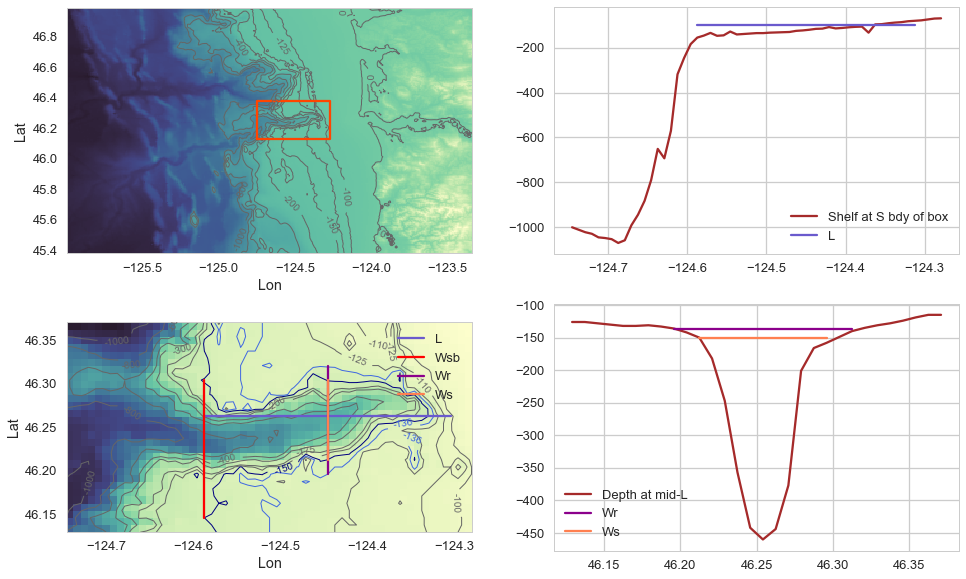

In [185]:
fig, ((ax1, ax3), (ax2,ax4)) = plt.subplots(2, 2, figsize=(16,10))

# plot whole region
ax1.pcolor(lon_Ast,lat_Ast,dep_Ast[:,:],cmap=cmo.cm.deep_r)
CS1 = ax1.contour(lon_Ast,lat_Ast,dep_Ast[:,],
                  [-1000, -800, -600, -400, -200, -150, -125,-100, 0],colors='0.4',linewidths=[1] )
ax1.clabel(CS1, inline=1, fontsize=10,fmt='%1.0f')

# plot red box
ax1.plot((lon_Ast[Wind],lon_Ast[Eind],lon_Ast[Eind],lon_Ast[Wind],lon_Ast[Wind]),
         (lat_Ast[Sind],lat_Ast[Sind],lat_Ast[Nind],lat_Ast[Nind],lat_Ast[Sind] ), marker='', color='orangered')

# plot only canyon
ax2.pcolor(lon_box,lat_box,astoria,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box, lat_box, astoria, 
                 [-1000, -800, -600, -400,-300, -200,-175,-150,-136,-125,-110,-100,-50, 0],
                 colors=['0.4','0.4','0.4','0.4','0.4','0.4','0.4','navy','royalblue','0.4','0.4','0.4','0.4'],linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

# plot dots to measure length 
xl1,xl2 = [19,53]
yl1,yl2 = [16,16]
ax2.plot([lon_box[xl1], lon_box[xl2]],[lat_box[yl1], lat_box[yl2]], '-', color='slateblue', label='L')
lat_Lon_Ast = [lat_box[yl1], lat_box[yl2]] 
lon_Lon_Ast = [lon_box[xl1], lon_box[xl2]]

# # plot dots to measure width at shelf break
x1,x2 = [19,19]
y1,y2 = [2,21]
ax2.plot([lon_box[x1], lon_box[x2]], [lat_box[y1], lat_box[y2]], 'r-', label='Wsb')
lat_Wsb_Ast = [lat_box[y1], lat_box[y2]] 
lon_Wsb_Ast = [lon_box[x1], lon_box[x2]]

# plot dots to measure width at rim depth at mid-length 
xr1,xr2 = [36,36]
yr1,yr2 = [8, 23]
ax2.plot([lon_box[xr1], lon_box[xr2]],[lat_box[yr1], lat_box[yr2]], '-',color='darkmagenta', label='Wr')
lat_Wr_Ast = [lat_box[yr1], lat_box[yr2]] 
lon_Wr_Ast = [lon_box[xr1], lon_box[xr2]]

# plot dots to measure width at mid-length 
xs1,xs2 = [36,36]
ys1,ys2 = [10,21]
ax2.plot([lon_box[xs1], lon_box[xs2]],[lat_box[ys1], lat_box[ys2]],'-',color='coral', label='Ws')
lat_Ws_Ast = [lat_box[ys1], lat_box[ys2]] 
lon_Ws_Ast = [lon_box[xs1], lon_box[xs2]]

# plot shelf profile
ax3.plot(lon_box,astoria[-3,:], color='brown',label='Shelf at S bdy of box')
ax3.plot(lon_box[xl1:xl2],-100*np.ones(np.shape(lon_box[xl1:xl2])), '-', color='slateblue', label='L')

# plot shelf profile
ax4.plot(lat_box,astoria[:,xr1], color='brown',label='Depth at mid-L')
ax4.plot(lat_box[yr1:yr2],-136*np.ones(np.shape(lat_box[yr1:yr2])), '-', color='darkmagenta', label='Wr')
ax4.plot(lat_box[ys1:ys2],-150*np.ones(np.shape(lat_box[ys1:ys2])), '-', color='coral', label='Ws')

# # labels
ax1.set_xlabel('Lon')
ax1.set_ylabel('Lat')
ax2.set_ylabel('Lat')
ax2.set_xlabel('Lon')

ax1.set_aspect(1)
ax2.set_aspect(1)

# ax1.invert_xaxis()
# ax2.invert_xaxis()

ax2.legend(loc=0)
ax3.legend(loc=0)
ax4.legend(loc=0)


In [186]:
np.shape(astoria)

(30, 57)

In [187]:
# Find widths uisng Haversine formula
Ws_Ast = haversine(np.radians(lat_Ws_Ast),np.radians(lon_Ws_Ast))
print('Astoria W_s = %1.1f km' %Ws_Ast)                    

Wr_Ast = haversine(np.radians(lat_Wr_Ast),np.radians(lon_Wr_Ast))
print('Astoria W_r = %1.1f km' %Wr_Ast)      

Wsb_Ast = haversine(np.radians(lat_Wsb_Ast),np.radians(lon_Wsb_Ast))
print('Astoria W_sb = %1.1f km' %Wsb_Ast)      

L_Ast = haversine(np.radians(lat_Lon_Ast),np.radians(lon_Lon_Ast))
print('Astoria L = %1.1f km' %L_Ast)      

Astoria W_s = 5.8 km
Astoria W_r = 7.9 km
Astoria W_sb = 10.0 km
Astoria L = 31.5 km


**Barkley**

In [46]:
lat_box2 = tDat['lat'][340:430]
lon_box2 = tDat['lon'][550:650]
barkley_depths = tDat['dpth'][340:430,550:650]

barkley = barkley_depths

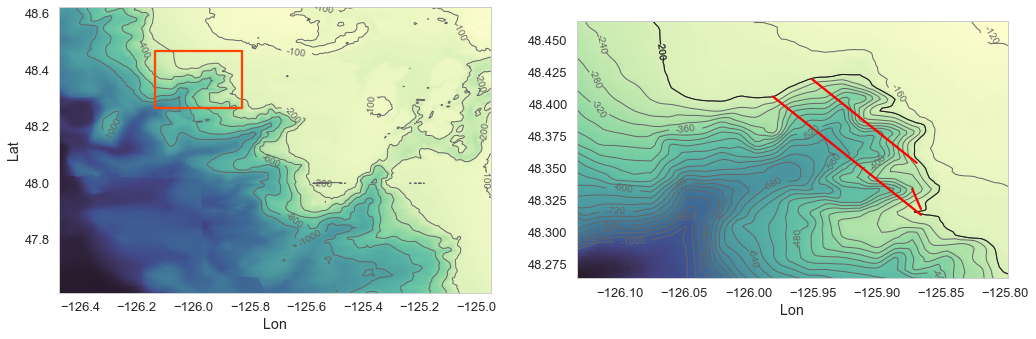

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,11))

ax1.pcolor(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],
                 [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)

# Plot box
ax1.plot((tDat['lon'][550], tDat['lon'][640], tDat['lon'][640], tDat['lon'][550],tDat['lon'][550]),
         (tDat['lat'][340],tDat['lat'][340], tDat['lat'][430], tDat['lat'][430],tDat['lat'][340]), 
         marker='', color='orangered')

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [ii for ii in range(-1000,0,40)],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [-200],colors='0.1',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

# plot dots to measure width at shelf break
ax2.plot([lon_box2[45], lon_box2[79]],[lat_box2[63], lat_box2[22]], 'r-')
lat_Wsb_Bar = [lat_box2[63], lat_box2[22]] 
lon_Wsb_Bar = [lon_box2[45], lon_box2[79]]

# plot dots to measure width at mid-length 
ax2.plot([lon_box2[54], lon_box2[78]],[lat_box2[69], lat_box2[40]], 'r-')
lat_Wml_Bar = [lat_box2[67], lat_box2[40]] 
lon_Wml_Bar = [lon_box2[54], lon_box2[78]]

ax1.set_xlabel('Lon')
ax1.set_ylabel('Lat')
ax2.set_xlabel('Lon')
ax1.set_aspect(1)
ax2.set_aspect(1)

In [83]:
# Find widths uisng Haversine formula
Wml_Bar = haversine(np.radians(lat_Wml_Bar),np.radians(lon_Wml_Bar))
print('Barkley W_mid = %1.1f km' %Wml_Bar)      

Wsb_Bar = haversine(np.radians(lat_Wsb_Bar),np.radians(lon_Wsb_Bar))
print('Barkley W_sb = %1.1f km' %Wsb_Bar)      

Barkley W_mid = 9.9 km
Barkley W_sb = 14.2 km
